# Principle Component Analysis:

Principle Componenet analysis is a method that rotates the dataset in a way such that the rotated feature are statictically uncorrelated.

The Algorithm proceeds by first finding the direction of maximum variance, direction in the data that contains most information.

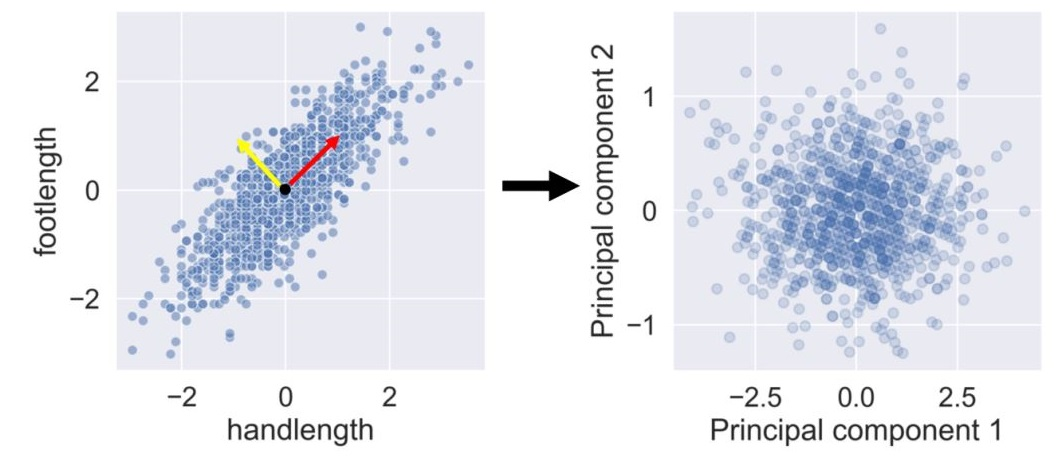



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 

import warnings
warnings.filterwarnings("ignore")
sns.set()

In [4]:
df = pd.read_csv('/weight-height.csv')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df2 = df.drop('Gender',axis=1)
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [8]:
df2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


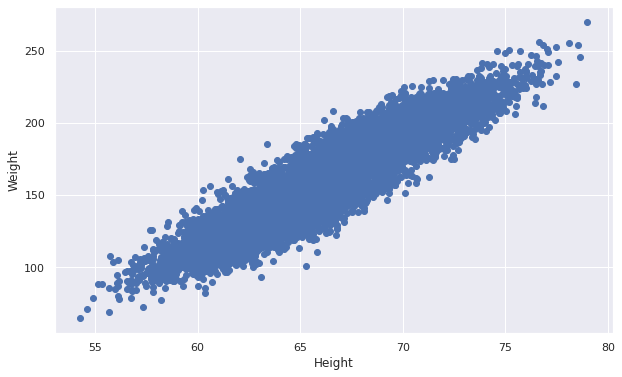

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df2['Height'],df2['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [11]:
pca = PCA(n_components=2)
transformed_features = pca.fit_transform(df2)

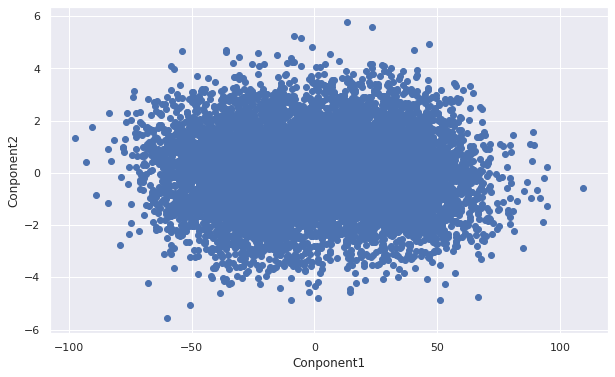

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(transformed_features[:,0],transformed_features[:,1])
plt.xlabel('Conponent1')
plt.ylabel('Conponent2')
plt.show()

## As we can see that it made the feature statistically uncorrelated. 

In [20]:
# Information features contains

print(pca.explained_variance_ratio_)

[0.9979748 0.0020252]


# Model Building

In [21]:
cancer_df = pd.read_csv('/cancer.csv')

In [22]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
cancer_df.shape

(569, 33)

In [25]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
cancer_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# Preprocessing

In [26]:
cancer_df = cancer_df.drop(['id','Unnamed: 32'],axis=1)

In [27]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
targets = {
    'M':'malignant',
    'B':'benign'
}

cancer_df['diagnosis'] = cancer_df['diagnosis'].map(targets)

In [30]:
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
X = cancer_df.drop('diagnosis',axis=1)
y = cancer_df['diagnosis']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.9590643274853801

In [ ]:
# Apply PCA

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# keep the first 2 components
pca = PCA(n_components=2)

# fit the PCA model
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print('Orignal shape: {}'.format(X_scaled.shape))
print('Reduced shape: {}'.format(X_pca.shape))

Orignal shape: (569, 30)
Reduced shape: (569, 2)


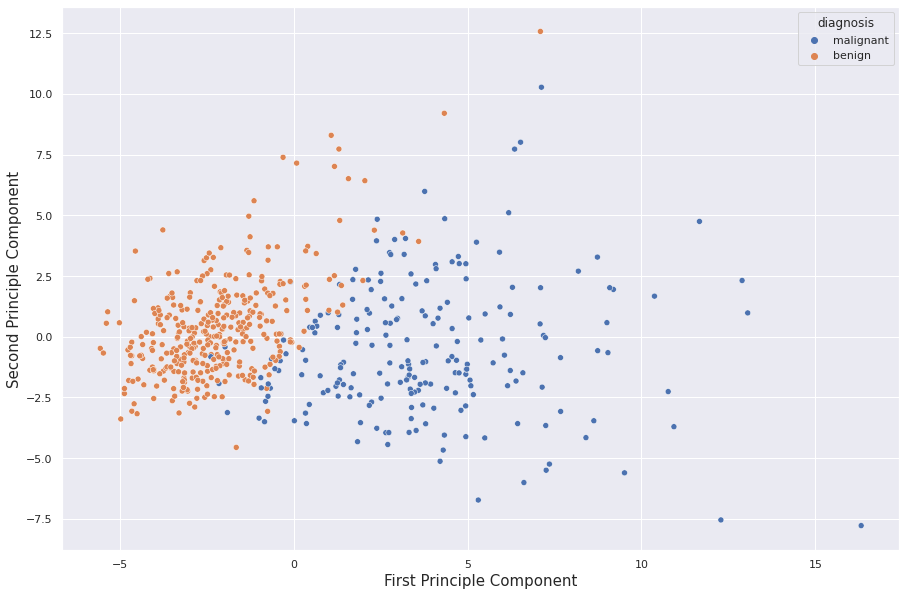

In [49]:
# Plot of the 2 principle components

plt.figure(figsize=(15,10))

sns.scatterplot(X_pca[:,0],X_pca[:,1],hue=cancer_df.diagnosis)
plt.xlabel('First Principle Component',fontsize=15)
plt.ylabel('Second Principle Component',fontsize=15)
plt.show()

In [50]:
# Modeling with these 2 components

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.9532163742690059

As we can see from the above results that we can acheive the similar accuracy just by reducing the feature size.

# Elbow Method for selecting best value for n_components.

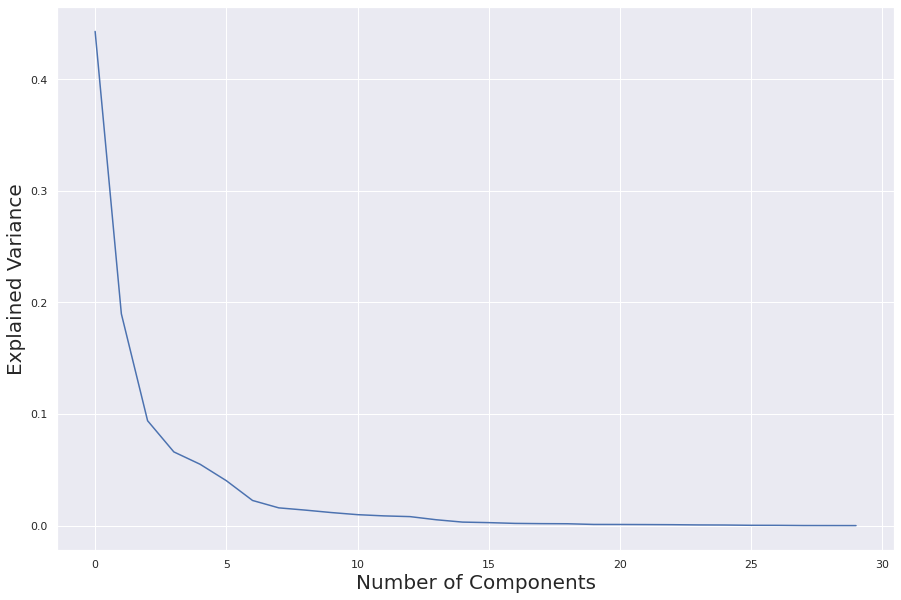

In [55]:
pca  =  PCA(n_components=30)

pca.fit(X_scaled)

var = pca.explained_variance_ratio_

plt.figure(figsize=(15,10))
plt.plot(var)
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('Explained Variance', fontsize=20)
plt.show()

# Resources:

## Articles

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553

## Video:
https://www.youtube.com/watch?v=FgakZw6K1QQ&t=358s

## Book:
**Introduction to Machine Learning , Andreas Muller**